In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# MURA

In [2]:
import sys
sys.path.append("../../fastai/")

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix

In [4]:
PATH = "/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/"  #MMIV
#PATH = "/Users/Sathiesh/MachineLearning/Deep_Learning_Kaliy/my_projects/mura/data/" #Home

In [5]:
os.listdir(PATH)

['test_submission_example.csv',
 'models',
 'tmp',
 'MURA-v1.0',
 'valid.csv',
 'test',
 'cleaned_label.csv',
 'train.csv']

In [6]:
df_train = pd.read_csv(f'{PATH}train.csv')
df_valid = pd.read_csv(f'{PATH}valid.csv')

In [7]:
df_train.head()

,MURA-v1.0/train/XR_SHOULDER/patient00001/study1_positive/image1.png,1
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [8]:
df_train.columns = ['Image Index', 'Abnormality']

In [9]:
df_valid.columns = ['Image Index', 'Abnormality']

In [10]:
df_train.shape, df_valid.shape

((37110, 2), (3224, 2))

In [11]:
df = pd.concat([df_train, df_valid], ignore_index=True)
df.head()

,Image Index,Abnormality
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [12]:
df.shape

(40334, 2)

In [13]:
df['Abnormality'] = df['Abnormality'].astype('bool')

In [14]:
val_idxs = np.array(range(len(df_train), len(df)))

In [15]:
cleaned_label_path = f'{PATH}cleaned_label.csv'
df.to_csv(cleaned_label_path, index=False)

# View data

In [16]:
sz = 64
arch = dn169
bs = 16

In [17]:
def get_data(sz): 
    tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip())  #transforms_side_on
    return ImageClassifierData.from_csv(PATH ,'', cleaned_label_path , test_name='test',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs);

In [18]:
data = get_data(sz)

In [19]:
fn = PATH+data.trn_ds.fnames[10]
fn 

'/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/MURA-v1.0/train/XR_ELBOW/patient00032/study1_negative/image2.png'

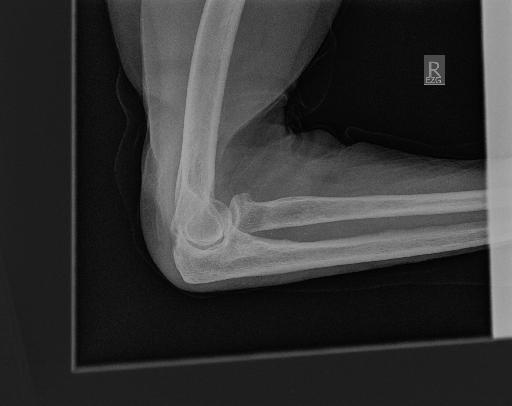

In [20]:
img = PIL.Image.open(fn);
img

In [21]:
data.trn_ds.fnames.shape ,data.val_ds.fnames.shape

((37110,), (3224,))

# Training

In [22]:
learn = ConvLearner.pretrained(arch, data, ps = 0.5, opt_fn=optim.Adam) 

 66%|██████▌   | 1521/2320 [00:51<00:27, 29.46it/s, loss=2.8]  

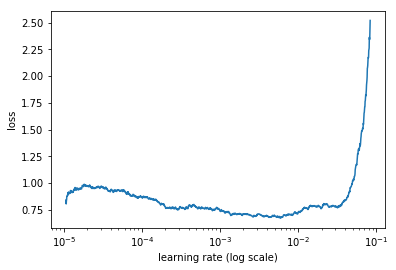

In [23]:
learn.lr_find()
learn.sched.plot()

In [24]:
lr = 0.00006

In [25]:
learn.fit(lr,3, cycle_len=1, cycle_mult =2) 

  8%|▊         | 177/2320 [00:07<01:26, 24.71it/s, loss=0.95] 

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.743861   0.611      0.672457  
    1      0.702514   0.588997   0.686104                      
    2      0.676549   0.600475   0.681141                      
    3      0.651344   0.583776   0.688275                      
    4      0.628925   0.573977   0.701613                      
    5      0.607895   0.573309   0.701303                      
    6      0.566394   0.572061   0.700372                      



[array([0.57206]), 0.7003722084367245]

 65%|██████▌   | 1516/2320 [00:49<00:26, 30.90it/s, loss=2.44] 

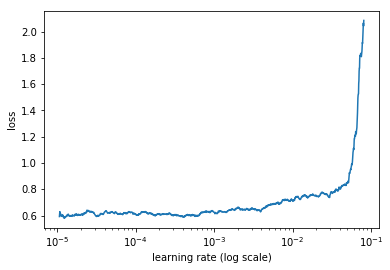

In [26]:
learn.lr_find()
learn.sched.plot()

In [27]:
lrs = [1e-5, 1e-4, 1e-3]
learn.unfreeze()

In [28]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  0%|          | 2/2320 [00:00<10:48,  3.58it/s, loss=0.836]

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.57061    0.549122   0.71402   
    1      0.53582    0.516529   0.755583                      
    2      0.506708   0.508542   0.756824                      
    3      0.523151   0.524343   0.745658                      
    4      0.512489   0.495216   0.776365                      
    5      0.437171   0.488482   0.78567                       
    6      0.447686   0.500068   0.781328                      



[array([0.50007]), 0.7813275434243176]

In [29]:
learn.save(f'{sz}')

In [30]:
sz = 128

In [31]:
learn.set_data(get_data(sz))
learn.freeze()

In [32]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.490846   0.536483   0.737283  
    1      0.492404   0.521461   0.748759                      
    2      0.491857   0.524669   0.749069                      
    3      0.471831   0.514807   0.753722                      
    4      0.480671   0.50361    0.764578                      
    5      0.478938   0.504298   0.763337                      
    6      0.479088   0.50211    0.766439                      



[array([0.50211]), 0.766439205955335]

In [33]:
learn.unfreeze();
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.459167   0.451366   0.800868  
    1      0.45723    0.456102   0.801799                      
    2      0.445398   0.43953    0.814206                      
    3      0.442651   0.449501   0.816998                      
    4      0.391357   0.447423   0.806452                      
    5      0.37212    0.452534   0.811725                      
    6      0.338946   0.466706   0.811414                      



[array([0.46671]), 0.8114143920595533]

In [34]:
learn.save(f'{sz}')

In [35]:
sz = 256

In [36]:
learn.set_data(get_data(sz))
learn.freeze() 

In [37]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.50343    0.508524   0.764268  
    1      0.469978   0.485327   0.771402                      
    2      0.459627   0.473093   0.774814                      
    3      0.464745   0.46285    0.778846                      
    4      0.4531     0.460695   0.780707                      
    5      0.461794   0.471509   0.780087                      
    6      0.446864   0.469303   0.782568                      



[array([0.4693]), 0.7825682382133995]

In [38]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
#Hvis ikke overfitting her: 
learn.save(f'{sz}121')

epoch      trn_loss   val_loss   accuracy                      
    0      0.413674   0.411332   0.827233  
    1      0.416648   0.413801   0.819789                      
    2      0.38982    0.409536   0.824752                      
    3      0.41908    0.441806   0.817928                      
    4      0.367771   0.408048   0.829715                      
    5      0.302487   0.42126    0.828784                      
    6      0.297287   0.429268   0.826613                      



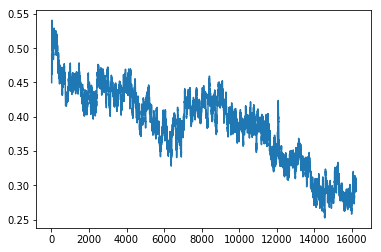

In [39]:
learn.sched.plot_loss()

# Transfer learning 

In [40]:
sz = 256
data = get_data(sz)

In [41]:
learnTL = ConvLearner.pretrained(arch, data, opt_fn=optim.Adam, ps = 0.5) 

In [42]:
learnTL.load('256169denne') #pretrained weights on chestX 14 dataset 

In [43]:
sz = 64

In [44]:
learnTL.set_data(get_data(sz))

 65%|██████▌   | 1515/2320 [00:54<00:29, 27.76it/s, loss=2.66] 

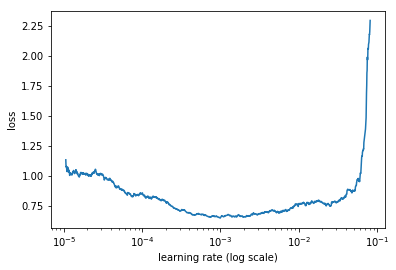

In [45]:
learnTL.lr_find()
learnTL.sched.plot()

In [46]:
lr = 0.0001

In [47]:
learnTL.fit(lr,3, cycle_len=1, cycle_mult =2) 

  6%|▌         | 130/2320 [00:05<01:26, 25.35it/s, loss=1]    

Exception in thread Thread-53:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.641237   0.651138   0.610732  
    1      0.618197   0.619256   0.657258                      
    2      0.633409   0.61511    0.665323                      
    3      0.602981   0.610857   0.668114                      
    4      0.603963   0.592991   0.688275                      
    5      0.571963   0.596651   0.679591                      
    6      0.604025   0.598362   0.680211                      



[array([0.59836]), 0.6802109181141439]

 65%|██████▌   | 1511/2320 [00:53<00:28, 27.98it/s, loss=2.32] 

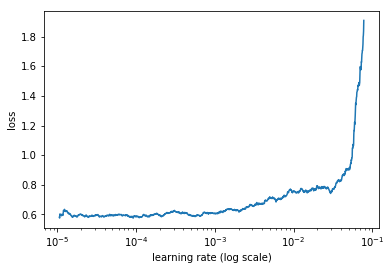

In [48]:
learnTL.lr_find()
learnTL.sched.plot()

In [49]:
lrs = [1e-6,1e-5,1e-4]
learnTL.unfreeze()

In [50]:
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  3%|▎         | 69/2320 [00:05<03:03, 12.29it/s, loss=0.639]

Exception in thread Thread-61:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.583176   0.582044   0.692928  
    1      0.554324   0.56815    0.71371                       
    2      0.561914   0.540983   0.730149                      
    3      0.534938   0.533672   0.729218                      
    4      0.538121   0.526427   0.734801                      
    5      0.519999   0.52148    0.740385                      
    6      0.532116   0.524259   0.740074                      



[array([0.52426]), 0.7400744416873449]

In [51]:
learnTL.save(f'{sz}TL')

In [52]:
sz = 128

In [53]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [54]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.543171   0.555842   0.717742  
    1      0.525165   0.548823   0.726117                      
    2      0.546599   0.541021   0.7317                        
    3      0.550621   0.534921   0.740074                      
    4      0.544033   0.53328    0.737283                      
    5      0.506389   0.523945   0.75031                       
    6      0.53413    0.529089   0.742866                      



[array([0.52909]), 0.7428660049627791]

In [55]:
learnTL.unfreeze()
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.50031    0.498246   0.759615  
    1      0.500539   0.491648   0.771092                      
    2      0.480836   0.475315   0.779777                      
    3      0.483375   0.465427   0.791563                      
    4      0.449136   0.465104   0.793734                      
    5      0.416872   0.460214   0.799007                      
    6      0.431158   0.456401   0.799007                      



[array([0.4564]), 0.7990074441687345]

In [56]:
learnTL.save(f'{sz}TL')

In [57]:
sz = 256

In [58]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [59]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.477401   0.491258   0.769541  
    1      0.489614   0.484733   0.776985                      
    2      0.480389   0.478894   0.780087                      
    3      0.483266   0.482785   0.779777                      
    4      0.491426   0.476226   0.783499                      
    5      0.498014   0.470087   0.784119                      
    6      0.486257   0.473177   0.782568                      



[array([0.47318]), 0.7825682382133995]

In [60]:
learnTL.save(f'{sz}TL')

In [61]:
learnTL.unfreeze()
learnTL.fit(lrs,3, cycle_len=1, cycle_mult=2)
#learnTL.save(f'{sz}TL') hvis den ikke overfitter

epoch      trn_loss   val_loss   accuracy                      
    0      0.468836   0.453212   0.796526  
    1      0.460787   0.436508   0.808623                      
    2      0.45625    0.437951   0.80335                       
    3      0.43313    0.4415     0.810484                      
    4      0.406273   0.430386   0.811414                      
    5      0.393636   0.43968    0.814516                      
    6      0.398291   0.438719   0.813586                      



[array([0.43872]), 0.8135856079404467]

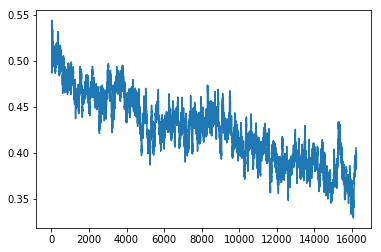

In [62]:
learnTL.sched.plot_loss()

# Prediction on test set

In [63]:
df_test = pd.read_csv(f'{PATH}test_submission_example.csv', header=None)

In [64]:
df_test.shape

(209, 2)

In [65]:
df_test.columns = ['Study','Abnormality']

In [66]:
df_test['Study'] = df_test['Study'].str.replace("/", "_")
df_test['Study'] = df_test['Study'].str.replace("test_","test/")

In [67]:
# maa lable y 
data.test_ds.y[:5] #alle er 0 

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [68]:
pos = 0; 
df_pos_img_indxs = {}
for stud in df_test['Study']: #eksempel: stud:  test/XR_FOREARM_patient12044_study1_
    indices = [i for i, s in enumerate(data.test_ds.fnames) if stud in s] #posisjonen til alle som 
    for j in indices:
        data.test_ds.y[j] = df_test['Abnormality'][pos]
    
    df_pos_img_indxs[pos] = indices
    pos= pos+1; 

In [69]:
data.test_ds.y[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [70]:
len(df_pos_img_indxs)

209

In [71]:
df_pos_img_indxs[0]

[56, 186, 253]

In [72]:
data.test_ds.y[56], data.test_ds.y[186], data.test_ds.y[253]

(array([1.]), array([1.]), array([1.]))

In [73]:
log_preds,y = learnTL.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)
accuracy = accuracy_np(probs, y)

In [74]:
accuracy

0.5974955277280859

### Predict studies 

In [75]:
test_list = data.test_ds.fnames
len(test_list)

559

In [76]:
#fjerne imagex.png fra stringen, så man kan finne alle bildene for et studie
def searching_string(pasient_image_path):
    string_size = len(pasient_image_path) - len('image1.png')
    return pasient_image_path[:string_size] 

In [77]:
#finne indeksene til bildene som er med i studiet
def find_img_indxs(pasient_study): 
    return [test_list.index(i) for i in test_list if pasient_study in i]

In [78]:
trn_tfms, val_tfms = tfms_from_model(arch, sz) # get transformations
def predict_abnormality(fn): 
    im = open_image(fn)
    im_val = val_tfms(im)
    preds = learnTL.predict_array(im_val[None])
    return np.argmax(preds)

you should use the 2nd return val from tfms_from_model. The first one includes data augmentation, e.g. for the training set. For predictions you don’t want that, so use the 2nd one.
Jeremy

In [79]:
#fjerne indeksene til bildene fra test_list når man er ferdig med å predikere et studie. 
def del_indxs(study_img_indxs):
    #for i in study_img_indxs: 
       # del test_list[i] 
    return np.delete(test_list, study_img_indxs).tolist()

In [80]:
predictions_dict = {}

while(len(test_list)>0): 
    string_study = searching_string(test_list[0])
    study_img_indxs = find_img_indxs(string_study)
    
    prediction_list = [] #skal inneholde alle predikasjonene for et studie

    #Her skal det predikeres på hvert av bildene i studiet
    for i in study_img_indxs: 
        prediction = predict_abnormality(PATH+test_list[i])
        prediction_list.append(prediction)
        
    predictions_dict[string_study] = max(prediction_list) # nøkkel : navnet til studiet + value: predikasjonen (hvis en av de er True, så er studiet True)
    
    #ferdig med predikasjon for et studie
    test_list = del_indxs(study_img_indxs)
    #print(find_img_indxs(string_study)) #bare for å teste at alle listene som retuneres er tomme 

In [81]:
len(predictions_dict)

209

In [82]:
y = []
preds = []

In [83]:
def add_values(y_value, preds_value): 
    y.append(y_value)
    preds.append(preds_value)

In [84]:
def test_accuracy(pred_dict, df_test): 
    num_correct = 0; 
    for key, value in pred_dict.items(): 
        searching_string = key
        row = df_test.loc[df_test['Study'] == searching_string]
        print("Dictionary key: " + str(key) + " value: " + str(value))
        print(row.values[0][0],row.values[0][1])
        if(row.values[0][1] == value): 
            num_correct+=1
        
        add_values(row.values[0][1], value)
        print()
    return num_correct/len(pred_dict)

In [85]:
test_accuracy(predictions_dict, df_test)

Dictionary key: test/XR_SHOULDER_patient12168_study1_ value: 1
test/XR_SHOULDER_patient12168_study1_ 1

Dictionary key: test/XR_FINGER_patient12241_study1_ value: 1
test/XR_FINGER_patient12241_study1_ 1

Dictionary key: test/XR_ELBOW_patient12117_study1_ value: 1
test/XR_ELBOW_patient12117_study1_ 0

Dictionary key: test/XR_FOREARM_patient12056_study1_ value: 1
test/XR_FOREARM_patient12056_study1_ 0

Dictionary key: test/XR_SHOULDER_patient12183_study1_ value: 0
test/XR_SHOULDER_patient12183_study1_ 0

Dictionary key: test/XR_HAND_patient12092_study1_ value: 1
test/XR_HAND_patient12092_study1_ 1

Dictionary key: test/XR_FOREARM_patient12067_study1_ value: 0
test/XR_FOREARM_patient12067_study1_ 0

Dictionary key: test/XR_ELBOW_patient12124_study1_ value: 1
test/XR_ELBOW_patient12124_study1_ 1

Dictionary key: test/XR_HAND_patient12076_study1_ value: 0
test/XR_HAND_patient12076_study1_ 1

Dictionary key: test/XR_ELBOW_patient12128_study1_ value: 0
test/XR_ELBOW_patient12128_study1_ 0

Di

0.5645933014354066

In [86]:
cm = confusion_matrix(y,preds);

[[54 35]
 [56 64]]


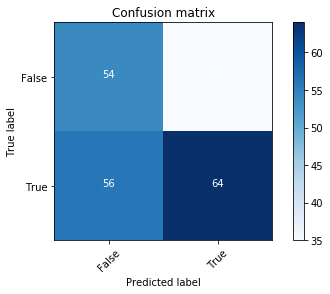

In [87]:
plot_confusion_matrix(cm, data.classes)